In [1]:
from PIL import Image, ImageDraw
import numpy as np
from math import cos, sin, pi, ceil
from IPython.display import display


In [2]:
im = Image.open("mona.jpg").convert('L')
shape = im.size
im = im.resize((1000, 1000 * shape[1] // shape[0]))
im.size

(1000, 1000)

In [3]:
print(im.format, im.size, im.mode)

None (1000, 1000) L


In [4]:
arr = np.asarray(im)

In [5]:
arr.shape

(1000, 1000)

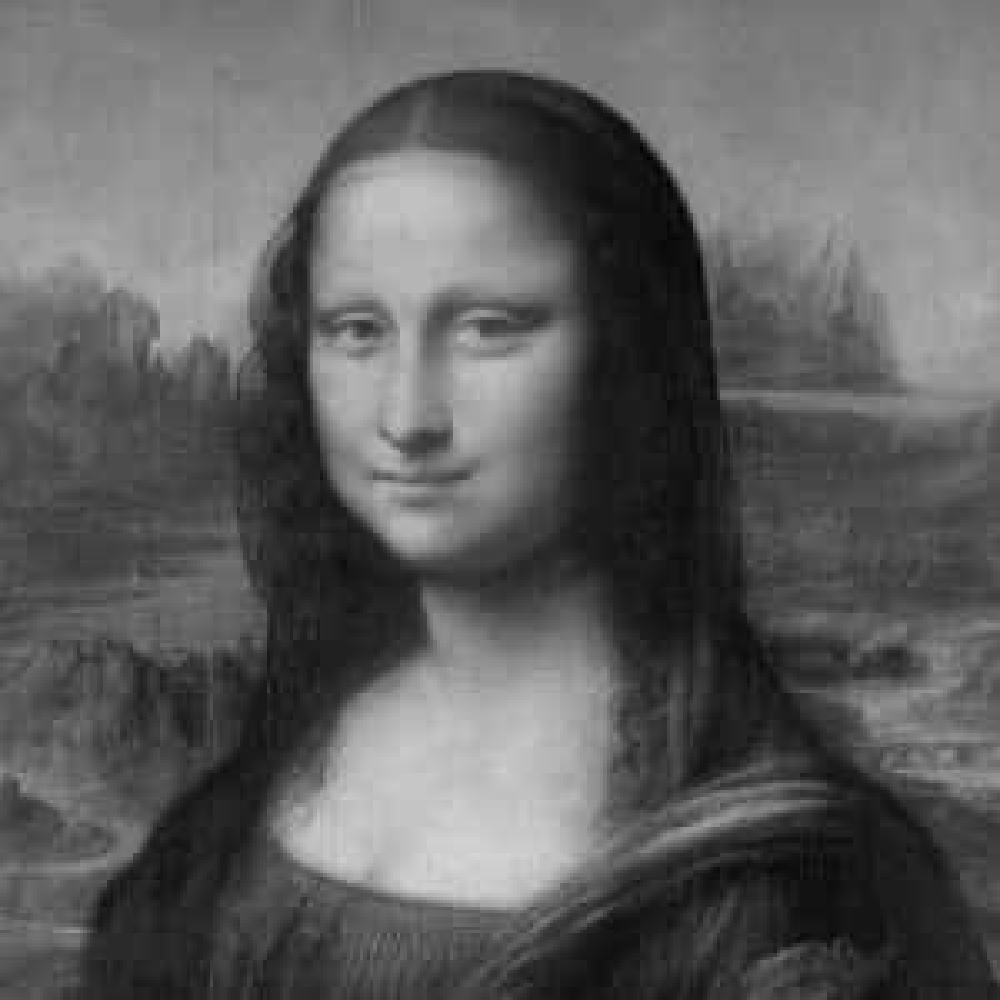

In [6]:
display(im)

In [7]:
def translate(point, screen_size):
    """
    Takes a point and converts it to the appropriate coordinate system.
    Note that PIL uses upper left as 0, we want the center.
    Args:
        point (real, real): A point in space.
        screen_size (int): Size of an N x N screen.
    Returns:
        (real, real): Translated point for Pillow coordinate system.
    """
    return point[0] + screen_size[0] / 2, point[1] + screen_size[1] / 2

In [8]:
def draw_spiral(a, b, img, step=1, loops=100):
    """
    Draw the Archimdean spiral defined by:
    r = a + b*theta
    Args:
        a (real): First parameter
        b (real): Second parameter
        img (Image): Image to write spiral to.
        step (real): How much theta should increment by. (default: 0.5)
        loops (int): How many times theta should loop around. (default: 5)
    """
    draw = ImageDraw.Draw(img)
    theta = 0.0
    r = a
    prev_x = int(r*cos(theta))
    prev_y = int(r*sin(theta))
    while theta < 2 * loops * pi:
        theta += step / r
        r = a + b*theta
        # Draw pixels, but remember to convert to Cartesian:
        x = int(r*cos(theta))
        y = int(r*sin(theta))
        tx, ty = translate((x, y), img.size)
        tx = int(tx)
        ty = int(ty)
        w = 1
        if ty < arr.shape[0] and tx < arr.shape[1] and ty >= 0 and tx >= 0:
            w = int((256 - arr[ty][tx]) / 60) + 1
        draw.line(translate((prev_x, prev_y), img.size) +
                  translate((x, y), img.size), fill=0, width=w)
        prev_x = x
        prev_y = y

In [9]:
img = Image.new('1', im.size, 1)
draw_spiral(1, 1, img)

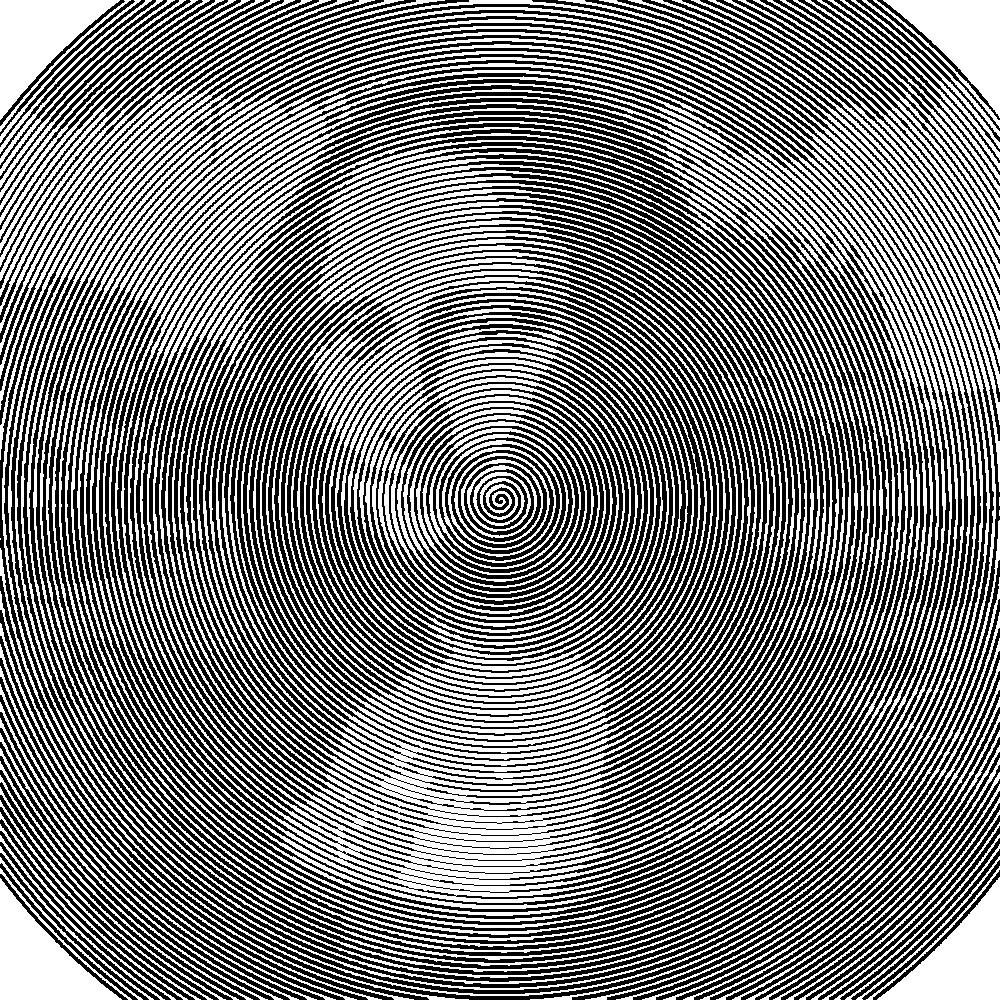

In [10]:
display(img)

In [11]:
np.amax(arr)

213